In [123]:
import pandas as pd
df=pd.read_excel('/content/EastWestAirlines.xlsx')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [124]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [125]:
df=df.drop('cc3_miles',axis=1)

In [126]:
df=df.drop('cc2_miles',axis=1)

In [127]:
df

,ID#,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,174,1,0,0,7000,0
1,2,19244,0,1,215,2,0,0,6968,0
2,3,41354,0,1,4123,4,0,0,7034,0
3,4,14776,0,1,500,1,0,0,6952,0
4,5,97752,0,4,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,981,5,0,0,1395,1
3996,4019,73597,0,3,25447,8,0,0,1402,1
3997,4020,54899,0,1,500,1,500,1,1401,0


In [128]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [129]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

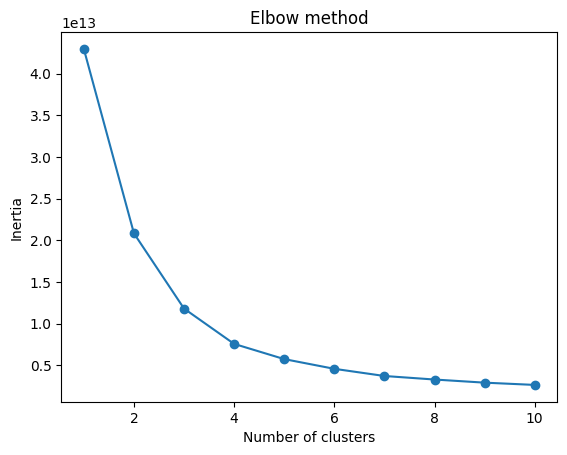

In [131]:
inertias=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i)
  y=kmeans.fit_predict(df)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [132]:
df['clusters']=y
df

,ID#,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,174,1,0,0,7000,0,2
1,2,19244,0,1,215,2,0,0,6968,0,2
2,3,41354,0,1,4123,4,0,0,7034,0,7
3,4,14776,0,1,500,1,0,0,6952,0,2
4,5,97752,0,4,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,981,5,0,0,1395,1,7
3996,4019,73597,0,3,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,500,1,500,1,1401,0,7


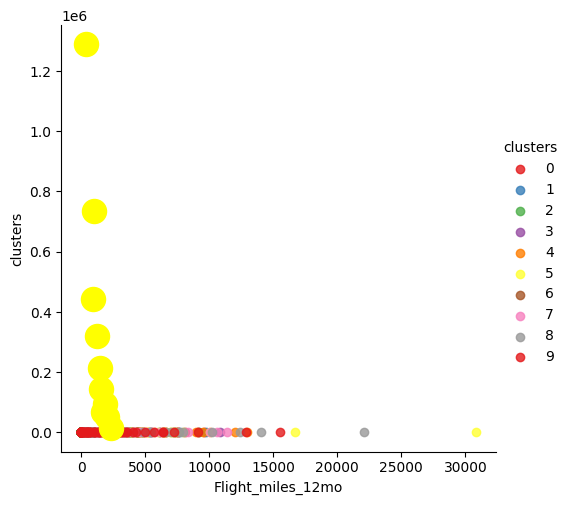

In [133]:
import seaborn as sns
sns.lmplot(data=df,x='Flight_miles_12mo',y='clusters',fit_reg=False,hue='clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow')
plt.show()

In [134]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
neigh_dist, neigh_ind = nbrs.kneighbors(df)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

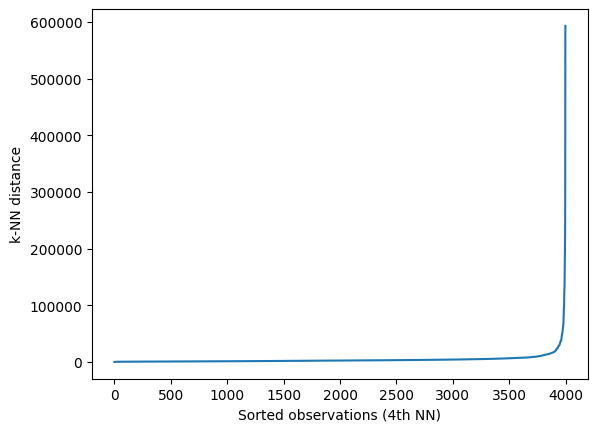

In [135]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [136]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
# get cluster labels
clusters.labels_
# check unique clusters
set(clusters.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [137]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 3999})

In [138]:
import numpy as np
x_n=np.arange(0,1,0.05) #[0,1]
np.sin(x_n*np.pi*2)

array([ 0.00000000e+00,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  1.22464680e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01])

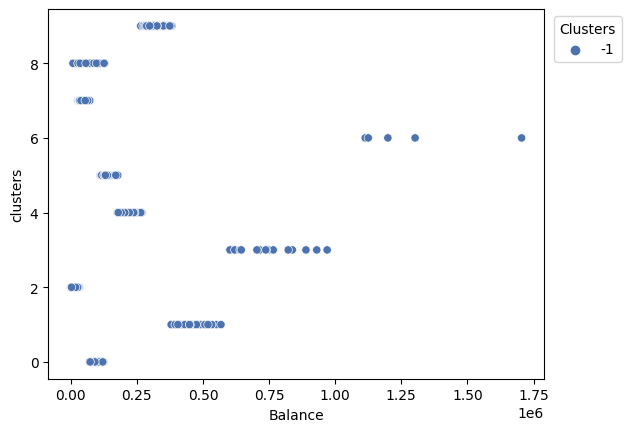

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, x = "Balance", y = "clusters", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [140]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(df)
clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 3, 3, ..., 1, 3, 3])

In [141]:
# Reduce the dimensionality of data to 2 features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['p1','p2']

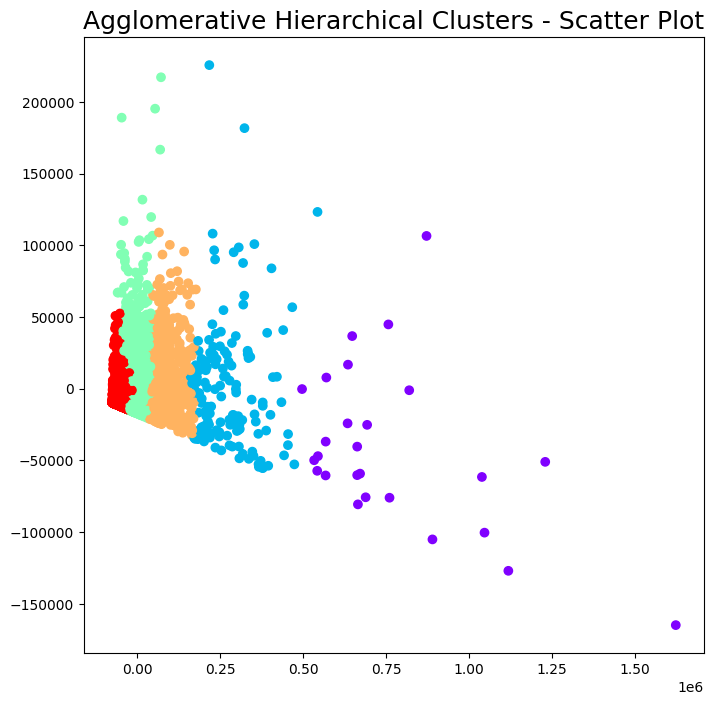

In [142]:
agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['p1'],df_pca['p2'],c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()